In [21]:
from src.PreProcess import getDegreeSequences
import networkx as nx
import pandas as pd
from src.struc2vec import struc2vec
from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA

In [2]:
from src.GraphAlgorithms import GraphAlgorithms as ga

In [3]:
df = pd.read_excel("src/UN_full.xlsx")

In [4]:
edgelist = [(origin, destination, {"weight":weight}) for origin, destination, weight in df[["origin","destination","weight_scaled"]].values]

In [5]:
G_D = nx.DiGraph(edgelist)
# G_UD = nx.Graph(edgelist)

In [6]:
nodes = list(G_D.nodes())[:20]

In [7]:
all_nodes = list(G_D.nodes())
for node in all_nodes:
    if node not in nodes:
        G_D.remove_node(node)

In [8]:
G_UD = nx.Graph(G_D)

In [9]:
s2vG = struc2vec(G_D)

In [10]:
s2vG.getMultiLevelGraph()

In [14]:
walks = s2vG.getRandomWalks(number_of_walks = 1000, walk_length=40)

In [16]:
model = Word2Vec(walks, vector_size=50)

In [17]:
embeddings = {node: model.wv[node] for node in s2vG.nodes}

In [20]:
X = np.array(list(embeddings.values()))

In [22]:
pca = PCA(n_components=3)
X_transform = pca.fit_transform(X)

In [23]:
node_embeddings = {}
for node, embedding in enumerate(X_transform):
    emb_list = list(embedding)
    index = emb_list.index(max(emb_list))
    node_embeddings[node] = index

In [24]:
cmap = {0:"green",1:"yellow", 2:"red"}
nodecolors = [cmap[v] for k,v in node_embeddings.items()]

In [33]:
weights = [min(edge[2]["weight"],5) for edge in s2vG.G_D.edges(data=True)]

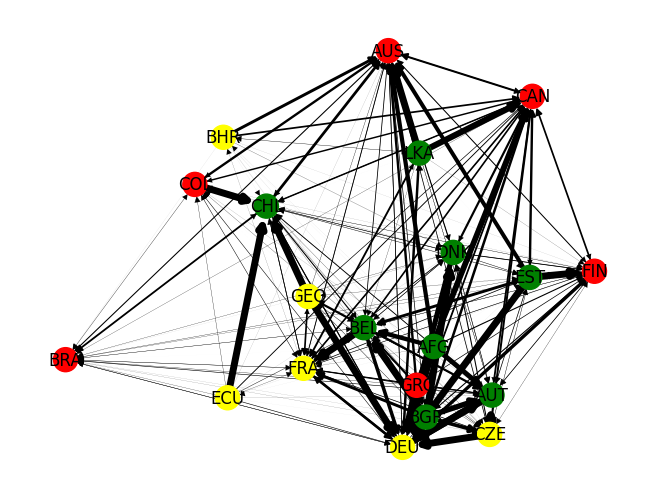

In [34]:
nx.draw_spring(s2vG.G_D, with_labels=True, node_color=nodecolors, width = weights)